# Introduction to Deep Learning - Assignment 1

## References
1. Complete Guide to TensorFlow for Deep Learning with Python (https://www.udemy.com/course/complete-guide-to-tensorflow-for-deep-learning-with-python/)
2. TFLearn (http://tflearn.org/examples/)
3. Tensorflow examples by Aymeric Damien (https://github.com/aymericdamien)

Importing the required libraries and the provided MNISTDataset method

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

In this code cell we are loading the MNIST dataset from "dataset.py" file and then we are restructuring the data and modifying the data type.  
We are also printing a sample training image and its respective class label to peek into the actual dataset

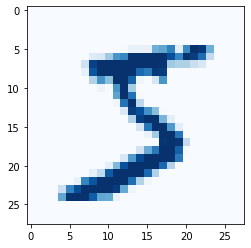

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="Blues")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In this code cell we have initialized variables related to class label, class features, learning rate, training step, display step and we have also defined the variables for nodes in the first and second layer.  
The value for "layer_1" and "layer_2" has been obtained by trail and error and tweaking the values to obtain high accuracy

In [3]:
train_steps = 1000
learning_rate = 0.1

# Define layers
layer_1 = 784 # 1st layer number of neurons.
layer_2 = 256 # 2nd layer number of neurons.

# Intialize number of features and classes
num_classes = 10 # total classes (0-9 digits)
num_features = 784 # data features (img shape: 28*28)

# Training parameters.
learning_rate = 0.1
training_steps = 1000

In this code cell we are defining the weights and biases for all of our layers. We have used the "RandomNormal" initializer to generate a normally distributed, non-zero values for our inital weights and zero vectors for our initial baises.  
The reason for choosing a non-zero initializer for our weight vectors is that since we multiply the weights with our multi layer inputs , we would end with a zero after multiplication but adding a zero in terms of a bias will not result in a total zero.

In [4]:
# A random value generator to initialize weights.
random_normal = tf.initializers.RandomNormal()

weights = {
    'l1': tf.Variable(random_normal([num_features, layer_1])),
    'l2': tf.Variable(random_normal([layer_1, layer_2]))
}
# Intializing biases as zero
biases = {
    'b1': tf.Variable(tf.zeros([layer_1])),
    'b2': tf.Variable(tf.zeros([layer_2]))
}

All that's left is to train the model now

In [5]:
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(tf.nn.relu(tf.matmul(img_batch, weights['l1']) + biases['b1']),weights['l2'])+biases['b2']
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [weights['l1'], biases['b1'],weights['l2'],biases['b2']])
    weights['l1'].assign_sub(learning_rate * grads[0])
    biases['b1'].assign_sub(learning_rate * grads[1])
    weights['l2'].assign_sub(learning_rate * grads[2])
    biases['b2'].assign_sub(learning_rate * grads[3])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 5.7878851890563965 Accuracy: 0.0
Loss: 0.3357069492340088 Accuracy: 0.9140625
Loss: 0.28503838181495667 Accuracy: 0.9453125
Loss: 0.2733749747276306 Accuracy: 0.9375
Loss: 0.30666255950927734 Accuracy: 0.890625
Starting new epoch...
Loss: 0.3448445796966553 Accuracy: 0.9140625
Loss: 0.22409966588020325 Accuracy: 0.9453125
Loss: 0.2769731879234314 Accuracy: 0.9375
Loss: 0.19530710577964783 Accuracy: 0.9453125
Loss: 0.3018382787704468 Accuracy: 0.9296875
Starting new epoch...


Let's see the accuracy on the test set

In [6]:
test_preds = tf.argmax(tf.matmul(tf.nn.relu(tf.matmul(data.test_data, weights['l1']) + biases['b1']),weights['l2'])+biases['b2'], axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)


tf.Tensor(0.9411, shape=(), dtype=float32)


Finally, let's make some predictions :)

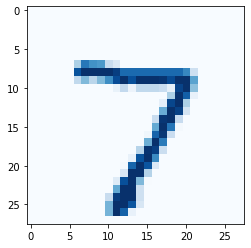

Model prediction : 7


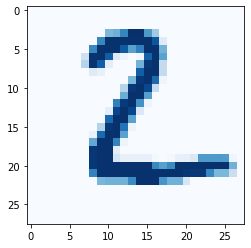

Model prediction : 2


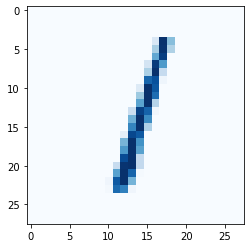

Model prediction : 1


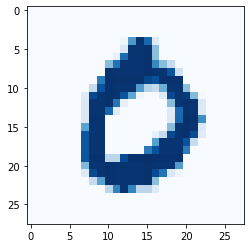

Model prediction : 0


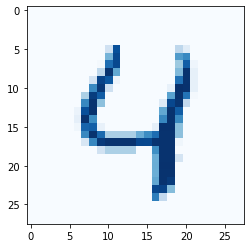

Model prediction : 4


In [7]:
n_images = 5
test_images = data.test_data[:n_images]
predictions = tf.argmax(tf.matmul(tf.nn.relu(tf.matmul(test_images, weights['l1']) + biases['b1']),weights['l2'])+biases['b2'], axis=1,
                       output_type=tf.int32)
n_predic = predictions.numpy()

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='Blues')
    plt.show()
    print("Model prediction :" , n_predic[i])

# **** Fashion MNIST ****

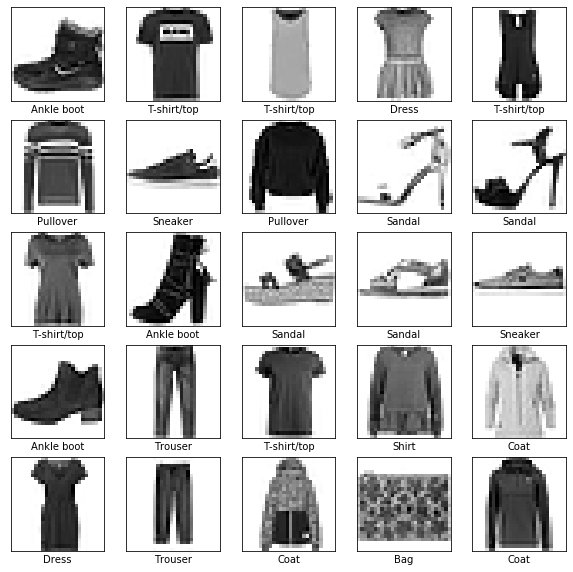

In [8]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

train_steps = 1000
learning_rate = 0.1

# Define layers
layer_1 = 784 # 1st layer number of neurons.
layer_2 = 256 # 2nd layer number of neurons.

# Intialize number of features and classes
num_classes = 10 # total classes (0-9 digits)
num_features = 784 # data features (img shape: 28*28)

# Training parameters.
learning_rate = 0.1
training_steps = 1000

# A random value generator to initialize weights.
random_normal = tf.initializers.RandomNormal()

weights = {
    'l1': tf.Variable(random_normal([num_features, layer_1])),
    'l2': tf.Variable(random_normal([layer_1, layer_2]))
}
# Intializing biases as zero
biases = {
    'b1': tf.Variable(tf.zeros([layer_1])),
    'b2': tf.Variable(tf.zeros([layer_2]))
}

#         logits = tf.matmul(img_batch, W) + b



In [10]:
for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        logits = tf.matmul(tf.nn.relu(tf.matmul(img_batch, weights['l1']) + biases['b1']),weights['l2'])+biases['b2']
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [weights['l1'], biases['b1'],weights['l2'],biases['b2']])
    weights['l1'].assign_sub(learning_rate * grads[0])
    biases['b1'].assign_sub(learning_rate * grads[1])
    weights['l2'].assign_sub(learning_rate * grads[2])
    biases['b2'].assign_sub(learning_rate * grads[3])
    
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))


Loss: 5.881059169769287 Accuracy: 0.0
Loss: 0.7458686828613281 Accuracy: 0.7578125
Loss: 0.4496135115623474 Accuracy: 0.8203125
Loss: 0.6667338013648987 Accuracy: 0.75
Loss: 0.48259595036506653 Accuracy: 0.8359375
Starting new epoch...
Loss: 0.5221860408782959 Accuracy: 0.7890625
Loss: 0.4345928430557251 Accuracy: 0.8359375
Loss: 0.4435328245162964 Accuracy: 0.8515625
Loss: 0.3634560704231262 Accuracy: 0.875
Loss: 0.5439831018447876 Accuracy: 0.796875
Starting new epoch...


In [11]:

test_preds = tf.argmax(tf.matmul(tf.nn.relu(tf.matmul(data.test_data, weights['l1']) + biases['b1']),weights['l2'])+biases['b2'], axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)



tf.Tensor(0.8262, shape=(), dtype=float32)


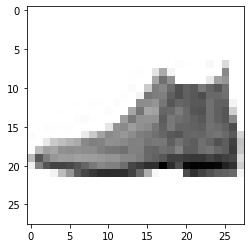

Model prediction : Ankle boot


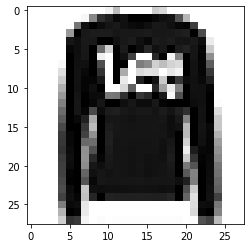

Model prediction : Pullover


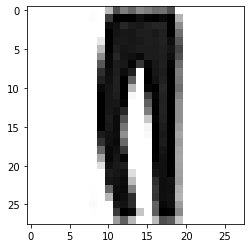

Model prediction : Trouser


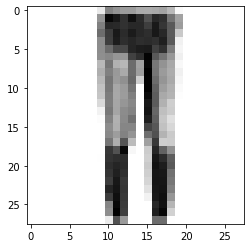

Model prediction : Trouser


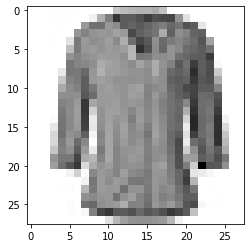

Model prediction : Shirt


In [12]:
n_images = 5
test_images = data.test_data[:n_images]
predictions = tf.argmax(tf.matmul(tf.nn.relu(tf.matmul(test_images, weights['l1']) + biases['b1']),weights['l2'])+biases['b2'], axis=1,
                       output_type=tf.int32)
n_predic = predictions.numpy()

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap=plt.cm.binary)
    plt.show()
    print("Model prediction :" , class_names[n_predic[i]])

# **** Experimentation ****

In [13]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Modify the data using datasets.py provived with the assignment
data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [14]:
# Intialize number of features and classes
num_classes = 10 # total classes (0-9 digits)
num_features = 784 # data features (img shape: 28*28)

# Training parameters.
learning_rate = 0.001
training_steps = 3000

display_step = 100 # Used for displayed current accuracy and loss 

# Define layers
layer_1 = 128 # 1st layer number of neurons.
layer_2 = 256 # 2nd layer number of neurons.

In [15]:
# Store layers weight & bias

# A random value generator to initialize weights.
random_normal = tf.initializers.RandomNormal()

weights = {
    'l1': tf.Variable(random_normal([num_features, layer_1])),
    'l2': tf.Variable(random_normal([layer_1, layer_2])),
    'out': tf.Variable(random_normal([layer_2, num_classes]))
}
# Intializing biases as zero
biases = {
    'b1': tf.Variable(tf.zeros([layer_1])),
    'b2': tf.Variable(tf.zeros([layer_2])),
    'out': tf.Variable(tf.zeros([num_classes]))
}

In [16]:
# Create the 'neural network'
def neural_net(x):
    # Hidden fully connected layer with 128 neurons.
    layer_1 = tf.add(tf.matmul(x, weights['l1']), biases['b1'])
    # Apply sigmoid to layer_1 output.
    layer_1 = tf.nn.sigmoid(layer_1)
    
    # Hidden fully connected layer with 256 neurons.
    layer_2 = tf.add(tf.matmul(layer_1, weights['l2']), biases['b2'])
    # Apply tanh to layer_2 output .
    layer_2 = tf.nn.tanh(layer_2)
    
    # Output fully connected layer with a neuron for each class.
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(out_layer)

In [17]:
# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    #correct_prediction = tf.equal(tf.argmax(y_pred, 1), y_true)
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)
    #return tf.reduce_mean(correct_prediction, axis=-1)

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [18]:
# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = list(weights.values()) + list(biases.values())

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [25]:
# Run training for the given number of steps.
for step in range(1,training_steps):
    img_batch, lbl_batch = data.next_batch()
    run_optimization(img_batch, lbl_batch)
    
    if step % display_step == 0:
        pred = neural_net(img_batch)
        loss = cross_entropy(pred, lbl_batch)
        acc = accuracy(pred, lbl_batch)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 100, loss: 15.263645, accuracy: 0.976562
step: 200, loss: 6.022300, accuracy: 0.992188
step: 300, loss: 6.715314, accuracy: 0.992188
Starting new epoch...
step: 400, loss: 5.335716, accuracy: 0.992188
step: 500, loss: 5.015395, accuracy: 0.992188
step: 600, loss: 3.038942, accuracy: 1.000000
step: 700, loss: 7.134572, accuracy: 0.984375
step: 800, loss: 5.915218, accuracy: 0.992188
Starting new epoch...
step: 900, loss: 6.771576, accuracy: 0.992188
step: 1000, loss: 7.079206, accuracy: 0.992188
step: 1100, loss: 9.247520, accuracy: 0.968750
step: 1200, loss: 4.519602, accuracy: 0.992188
step: 1300, loss: 7.579339, accuracy: 0.984375
Starting new epoch...
step: 1400, loss: 9.662672, accuracy: 0.984375
step: 1500, loss: 3.541431, accuracy: 0.992188
step: 1600, loss: 4.450400, accuracy: 1.000000
step: 1700, loss: 5.038842, accuracy: 1.000000
Starting new epoch...
step: 1800, loss: 2.781622, accuracy: 1.000000
step: 1900, loss: 7.532280, accuracy: 0.992188
step: 2000, loss: 10.861745

In [26]:
# Test model on test data
pred = neural_net(data.test_data)
print("Test Accuracy: %f" % accuracy(pred, data.test_labels))

Test Accuracy: 0.972800
